# Distance Metrics: Understanding Spatial Relationships

## Learning Objectives
By the end of this notebook, you will understand:
- Three fundamental distance metrics: Euclidean, Manhattan, and Chebyshev
- How different distance metrics measure spatial relationships
- Visual representations of distance calculations
- When to use each distance metric in practice
- Applications in machine learning and data analysis

## Introduction
Distance metrics are fundamental concepts in mathematics, statistics, and machine learning. They quantify how "far apart" two points are in space, but different metrics define "distance" in different ways:

- **Euclidean Distance**: Straight-line distance (as the crow flies)
- **Manhattan Distance**: Grid-based distance (city block distance)
- **Chebyshev Distance**: Maximum coordinate difference (chessboard distance)

This notebook visualizes these three distance metrics using the original plot design to help you understand their geometric interpretations.

In [1]:
# Import the required libraries.
from typing import Dict, Tuple

import numpy as np
import matplotlib.pyplot as plt

print("Libraries imported successfully!")
print("Ready to explore distance metrics with visual demonstrations")

Libraries imported successfully!
Ready to explore distance metrics with visual demonstrations


## Step 1: Define the Original Plotting Function

Let's recreate the exact plotting function from the original script to maintain the same visualization design.

In [2]:
def plot_distance(axes: np.ndarray, points: Tuple, distances: Dict):
    """
    Plot the distances between two points on the provided axes.

    Args:
        axes (np.ndarray): The matplotlib axes object.
        points (Tuple): A tuple containing two points.
        distances (Dict): A dictionary containing the distance metrics
    """

    # Unpack the points.
    point1, point2 = points

    # Plot the distance metrics.
    for i, (key, value) in enumerate(distances.items()):
        if key == "Euclidean":
            # Euclidean Distance Plot.
            axes[i].plot(
                [point1[0], point2[0]], [point1[1], point2[1]], "#179E86", lw=2)

        elif key == "Manhattan":
            # Manhattan Distance Plot.
            x_steps = [point1[0]]
            y_steps = [point1[1], point1[1]]
            for j in range(1, 7):
                x_steps += [point1[0] + j, point1[0] + j]
                y_steps += [point1[1] + j, point1[1] + j]
            x_steps.append(point2[0])
            axes[i].step(x_steps, y_steps, "#F59B11", lw=2)

        elif key == "Chebyshev":
            # Chebyshev Distance Plot.
            axes[i].plot(
                [point1[0], point1[0]], [point1[1], point2[1]], "#44546A", linestyle="dashed", lw=1)
            axes[i].plot(
                [point1[0], point2[0]], [point2[1], point2[1]], "#C03B26", lw=2)

        # Common settings for all plots.
        axes[i].scatter(point1[0], point1[1], color="black")
        axes[i].text(
            point1[0] - 0.2, point1[1], f"u=({point1[0]}, {point1[1]})",
            fontsize=10, ha="right"
        )
        axes[i].scatter(point2[0], point2[1], color="black")
        axes[i].text(
            point2[0] + 0.2, point2[1], f"v=({point2[0]}, {point2[1]})",
            fontsize=10, ha="left"
        )
        axes[i].set_title(f"{key} = {value:.2f}")
        axes[i].set_xlabel("X")
        axes[i].set_ylabel("Y")
        axes[i].set_xlim(0, 10)
        axes[i].set_ylim(0, 10)
        axes[i].xaxis.set_major_locator(plt.MultipleLocator(1))
        axes[i].yaxis.set_major_locator(plt.MultipleLocator(1))

print("Original plotting function defined successfully!")
print("Function preserves exact colors and styling from the original script")

Original plotting function defined successfully!
Function preserves exact colors and styling from the original script


## Step 2: Define Points and Calculate Distances

Let's use the same points as in the original script and calculate all three distance metrics.

In [3]:
# Define two points.
point1 = np.array([2, 2])
point2 = np.array([8, 8])

print("Points defined:")
print(f"Point 1 (u): {point1}")
print(f"Point 2 (v): {point2}")
print(f"Coordinate differences: Δx = {point2[0] - point1[0]}, Δy = {point2[1] - point1[1]}")

Points defined:
Point 1 (u): [2 2]
Point 2 (v): [8 8]
Coordinate differences: Δx = 6, Δy = 6


In [4]:
# Calculate the distances.
distances = {
    "Euclidean": np.linalg.norm(point1 - point2),
    "Manhattan": np.sum(np.abs(point1 - point2)),
    "Chebyshev": np.max(np.abs(point1 - point2))
}

print("Distance calculations:")
print("=" * 40)
print(f"Euclidean Distance: {distances['Euclidean']:.2f}")
print(f"  Formula: √[(x₂-x₁)² + (y₂-y₁)²]")
print(f"  Calculation: √[(8-2)² + (8-2)²] = √[36 + 36] = √72 = {distances['Euclidean']:.2f}")

print(f"\nManhattan Distance: {distances['Manhattan']:.2f}")
print(f"  Formula: |x₂-x₁| + |y₂-y₁|")
print(f"  Calculation: |8-2| + |8-2| = 6 + 6 = {distances['Manhattan']:.2f}")

print(f"\nChebyshev Distance: {distances['Chebyshev']:.2f}")
print(f"  Formula: max(|x₂-x₁|, |y₂-y₁|)")
print(f"  Calculation: max(|8-2|, |8-2|) = max(6, 6) = {distances['Chebyshev']:.2f}")

Distance calculations:
Euclidean Distance: 8.49
  Formula: √[(x₂-x₁)² + (y₂-y₁)²]
  Calculation: √[(8-2)² + (8-2)²] = √[36 + 36] = √72 = 8.49

Manhattan Distance: 12.00
  Formula: |x₂-x₁| + |y₂-y₁|
  Calculation: |8-2| + |8-2| = 6 + 6 = 12.00

Chebyshev Distance: 6.00
  Formula: max(|x₂-x₁|, |y₂-y₁|)
  Calculation: max(|8-2|, |8-2|) = max(6, 6) = 6.00


## Step 3: Create the Original Visualization

Now let's create the exact visualization from the original script with the same styling and layout.

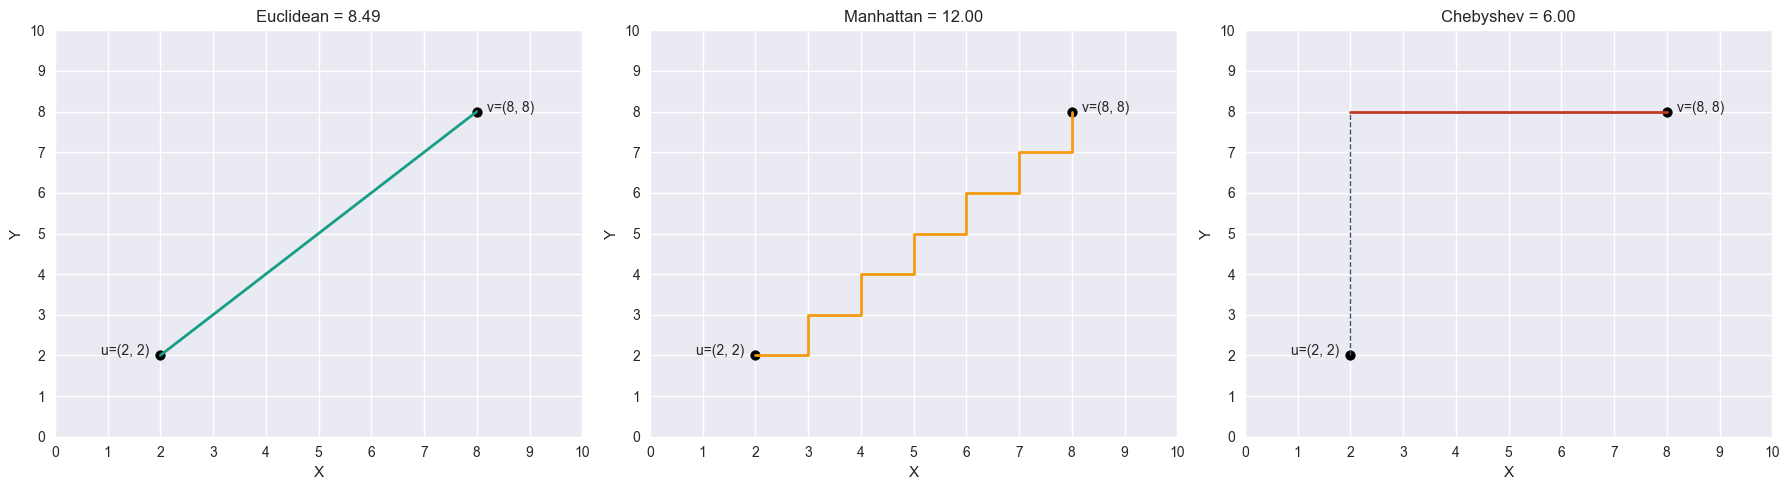

In [5]:
# Define the plot style.
with plt.style.context("seaborn-v0_8"):

    # Create the plot.
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Call the function with the points, distances, and types to plot.
    plot_distance(axes, (point1, point2), distances)

    # Adjust layout and show the plot.
    plt.tight_layout()
    plt.show()

## Step 4: Understanding Each Distance Metric

Let's analyze what each visualization shows and when to use each metric.

In [6]:
print("DISTANCE METRICS ANALYSIS")
print("=" * 50)

print("1. EUCLIDEAN DISTANCE (Green Line)")
print("   • Represents: Straight-line distance")
print("   • Color: #179E86 (Teal)")
print("   • Use cases:")
print("     - Physical distance measurements")
print("     - k-NN classification with continuous features")
print("     - Clustering algorithms (k-means)")
print("     - Image similarity comparison")

print("\n2. MANHATTAN DISTANCE (Orange Steps)")
print("   • Represents: Grid-based path distance")
print("   • Color: #F59B11 (Orange)")
print("   • Use cases:")
print("     - City navigation (taxi cab distance)")
print("     - High-dimensional sparse data")
print("     - Feature spaces with different units")
print("     - Robust to outliers")

print("\n3. CHEBYSHEV DISTANCE (Red Line)")
print("   • Represents: Maximum coordinate difference")
print("   • Colors: #44546A (dashed) + #C03B26 (solid)")
print("   • Use cases:")
print("     - Chess king movement")
print("     - Uniform scaling scenarios")
print("     - Maximum error measurements")
print("     - Image processing applications")

print(f"\nMATHEMATICAL RELATIONSHIPS:")
print("-" * 35)
print(f"For our points {point1} and {point2}:")
print(f"• Manhattan ≥ Euclidean: {distances['Manhattan']:.2f} ≥ {distances['Euclidean']:.2f} ✓")
print(f"• Euclidean ≥ Chebyshev: {distances['Euclidean']:.2f} ≥ {distances['Chebyshev']:.2f} ✓")
print(f"• This relationship: Manhattan ≥ Euclidean ≥ Chebyshev always holds")

DISTANCE METRICS ANALYSIS
1. EUCLIDEAN DISTANCE (Green Line)
   • Represents: Straight-line distance
   • Color: #179E86 (Teal)
   • Use cases:
     - Physical distance measurements
     - k-NN classification with continuous features
     - Clustering algorithms (k-means)
     - Image similarity comparison

2. MANHATTAN DISTANCE (Orange Steps)
   • Represents: Grid-based path distance
   • Color: #F59B11 (Orange)
   • Use cases:
     - City navigation (taxi cab distance)
     - High-dimensional sparse data
     - Feature spaces with different units
     - Robust to outliers

3. CHEBYSHEV DISTANCE (Red Line)
   • Represents: Maximum coordinate difference
   • Colors: #44546A (dashed) + #C03B26 (solid)
   • Use cases:
     - Chess king movement
     - Uniform scaling scenarios
     - Maximum error measurements
     - Image processing applications

MATHEMATICAL RELATIONSHIPS:
-----------------------------------
For our points [2 2] and [8 8]:
• Manhattan ≥ Euclidean: 12.00 ≥ 8.49 ✓
• Eucl

## Step 5: Exploring Different Point Configurations

Let's see how these metrics behave with different point arrangements.

In [7]:
# Test different point configurations
test_cases = [
    ("Diagonal Movement", np.array([1, 1]), np.array([5, 5])),
    ("Horizontal Movement", np.array([2, 5]), np.array([8, 5])), 
    ("Vertical Movement", np.array([5, 2]), np.array([5, 8])),
    ("L-shaped Movement", np.array([1, 7]), np.array([7, 1]))
]

print("DISTANCE METRICS FOR DIFFERENT MOVEMENTS")
print("=" * 55)

for case_name, p1, p2 in test_cases:
    euclidean = np.linalg.norm(p1 - p2)
    manhattan = np.sum(np.abs(p1 - p2))
    chebyshev = np.max(np.abs(p1 - p2))
    
    print(f"\n{case_name}:")
    print(f"  Points: {p1} → {p2}")
    print(f"  Euclidean: {euclidean:.2f}")
    print(f"  Manhattan: {manhattan:.2f}")
    print(f"  Chebyshev: {chebyshev:.2f}")
    
    # Analyze the pattern
    if euclidean == manhattan == chebyshev:
        pattern = "All metrics equal (pure horizontal/vertical)"
    elif manhattan == 2 * chebyshev:
        pattern = "Manhattan = 2 × Chebyshev (diagonal)"
    else:
        pattern = "General case"
    print(f"  Pattern: {pattern}")

print(f"\nKEY INSIGHTS:")
print("-" * 15)
print("• Horizontal/Vertical moves: All three metrics can be equal")
print("• Pure diagonal moves: Manhattan = √2 × Euclidean")
print("• L-shaped moves: Show maximum difference between metrics")
print("• Choice of metric affects clustering and classification results")

DISTANCE METRICS FOR DIFFERENT MOVEMENTS

Diagonal Movement:
  Points: [1 1] → [5 5]
  Euclidean: 5.66
  Manhattan: 8.00
  Chebyshev: 4.00
  Pattern: Manhattan = 2 × Chebyshev (diagonal)

Horizontal Movement:
  Points: [2 5] → [8 5]
  Euclidean: 6.00
  Manhattan: 6.00
  Chebyshev: 6.00
  Pattern: All metrics equal (pure horizontal/vertical)

Vertical Movement:
  Points: [5 2] → [5 8]
  Euclidean: 6.00
  Manhattan: 6.00
  Chebyshev: 6.00
  Pattern: All metrics equal (pure horizontal/vertical)

L-shaped Movement:
  Points: [1 7] → [7 1]
  Euclidean: 8.49
  Manhattan: 12.00
  Chebyshev: 6.00
  Pattern: Manhattan = 2 × Chebyshev (diagonal)

KEY INSIGHTS:
---------------
• Horizontal/Vertical moves: All three metrics can be equal
• Pure diagonal moves: Manhattan = √2 × Euclidean
• L-shaped moves: Show maximum difference between metrics
• Choice of metric affects clustering and classification results


## Step 6: Machine Learning Applications

Let's understand how distance metrics impact machine learning algorithms.

In [8]:
print("DISTANCE METRICS IN MACHINE LEARNING")
print("=" * 45)

ml_applications = {
    "k-Nearest Neighbors (k-NN)": {
        "Euclidean": "Standard choice for continuous features",
        "Manhattan": "Better for high-dimensional or sparse data",
        "Chebyshev": "When all features equally important"
    },
    "Clustering Algorithms": {
        "Euclidean": "k-means, hierarchical clustering",
        "Manhattan": "k-medians, robust clustering",
        "Chebyshev": "Specific domain applications"
    },
    "Anomaly Detection": {
        "Euclidean": "Standard outlier detection",
        "Manhattan": "Robust to coordinate-wise outliers",
        "Chebyshev": "Detecting extreme values in any dimension"
    }
}

for algorithm, metrics in ml_applications.items():
    print(f"\n{algorithm}:")
    for metric, usage in metrics.items():
        print(f"  {metric}: {usage}")

print(f"\nCHOOSING THE RIGHT METRIC:")
print("-" * 35)
selection_guide = [
    ("Data Type", "Continuous → Euclidean, Categorical → Manhattan"),
    ("Dimensionality", "High dims → Manhattan (curse of dimensionality)"),
    ("Scale Sensitivity", "Different scales → Manhattan (more robust)"),
    ("Outliers", "Present → Manhattan (less sensitive)"),
    ("Interpretation", "Physical distance → Euclidean"),
    ("Performance", "Speed needed → Manhattan (faster computation)")
]

for criterion, guidance in selection_guide:
    print(f"• {criterion}: {guidance}")

print(f"\nCOMPUTATIONAL COMPLEXITY:")
print("-" * 30)
print("• Euclidean: O(d) with square root operation")
print("• Manhattan: O(d) with simple additions")  
print("• Chebyshev: O(d) with max operation")
print("  (d = number of dimensions)")

DISTANCE METRICS IN MACHINE LEARNING

k-Nearest Neighbors (k-NN):
  Euclidean: Standard choice for continuous features
  Manhattan: Better for high-dimensional or sparse data
  Chebyshev: When all features equally important

Clustering Algorithms:
  Euclidean: k-means, hierarchical clustering
  Manhattan: k-medians, robust clustering
  Chebyshev: Specific domain applications

Anomaly Detection:
  Euclidean: Standard outlier detection
  Manhattan: Robust to coordinate-wise outliers
  Chebyshev: Detecting extreme values in any dimension

CHOOSING THE RIGHT METRIC:
-----------------------------------
• Data Type: Continuous → Euclidean, Categorical → Manhattan
• Dimensionality: High dims → Manhattan (curse of dimensionality)
• Scale Sensitivity: Different scales → Manhattan (more robust)
• Outliers: Present → Manhattan (less sensitive)
• Interpretation: Physical distance → Euclidean
• Performance: Speed needed → Manhattan (faster computation)

COMPUTATIONAL COMPLEXITY:
-------------------

## Key Takeaways

### Visual Understanding
1. **Euclidean (Green)**: Direct straight-line path between points
2. **Manhattan (Orange)**: Step-wise path following grid lines
3. **Chebyshev (Red)**: Maximum single-coordinate movement

### Mathematical Properties
- **Manhattan ≥ Euclidean ≥ Chebyshev** (inequality always holds)
- **Euclidean**: Minimizes path length in continuous space
- **Manhattan**: Sum of absolute coordinate differences
- **Chebyshev**: Maximum absolute coordinate difference

### Practical Applications
- **Euclidean**: Physical measurements, image analysis, continuous features
- **Manhattan**: City navigation, sparse data, robust algorithms
- **Chebyshev**: Game theory, uniform scaling, maximum error bounds

### Machine Learning Considerations
- **Feature scaling** affects Euclidean more than Manhattan
- **High dimensions** favor Manhattan (curse of dimensionality)
- **Mixed data types** often work better with Manhattan
- **Computational speed** varies: Manhattan fastest, Euclidean requires square root

### Selection Guidelines
1. **Start with Euclidean** for continuous, well-scaled data
2. **Use Manhattan** for high-dimensional or mixed-scale data
3. **Consider Chebyshev** for uniform importance across dimensions
4. **Test multiple metrics** and compare results empirically

Understanding these distance metrics is fundamental for choosing appropriate algorithms and interpreting their results in machine learning and data analysis applications.